# 完全采用 VGG 16 预先训练的模型

## 载入套件

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np

## 载入模型

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

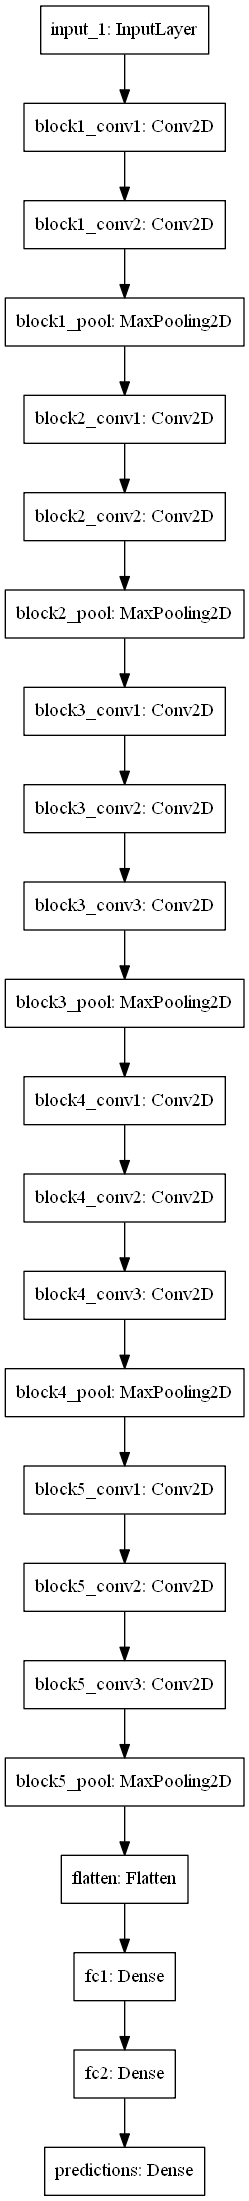

In [2]:
model = VGG16(weights='imagenet')
print(model.summary())

# 绘制模型结构
tf.keras.utils.plot_model(model, to_file='vgg16.png')

## 模型预测

In [3]:
# 任选一张图片，例如大象侧面照
img_path = './images_test/elephant.jpg'
# 载入图档，并缩放宽高为 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一维，变成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 预测
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每个物件属性包括 (类别代码, 名称, 机率)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504013', 'Indian_elephant', 0.71757543), ('n02504458', 'African_elephant', 0.24314547), ('n01871265', 'tusker', 0.03646196)]


In [4]:
# 任选一张图片，例如大象正面照
img_path = './images_test/elephant2.jpg'
# 载入图档，并缩放宽高为 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一维，变成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 预测
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每个物件属性包括 (类别代码, 名称, 机率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01871265', 'tusker', 0.6350199), ('n02504458', 'African_elephant', 0.32292533), ('n02504013', 'Indian_elephant', 0.042053085)]


## 载入 resnet 50 模型

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

# 预先训练好的模型 -- ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 51s 0us/step


In [6]:
# 任意一张图片，例如老虎大头照
img_path = './images_test/tiger3.jpg'
# 载入图档，并缩放宽高为 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一维，变成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 预测
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每个物件属性包括 (类别代码, 名称, 机率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129604', 'tiger', 0.86280096), ('n02123159', 'tiger_cat', 0.13676018), ('n02128925', 'jaguar', 0.0004142467)]


# 侧面照

In [7]:
img_path = './images_test/tiger2.jpg'
# 载入图档，并缩放宽高为 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))
# 加一维，变成 (1, 224, 224, 3)，最后一维是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 预测
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每个物件属性包括 (类别代码, 名称, 机率)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129604', 'tiger', 0.9644446), ('n02123159', 'tiger_cat', 0.029114593), ('n02391049', 'zebra', 0.006298941)]
